In [1]:
from numba_conv2d import NumbaConv2d
from numba_batchnorm2d import NumbaBatchNorm2d
from numba_relu import NumbaReLU
from numba_maxpool2d import NumbaMaxPool2d
from numba_linear import NumbaLinear
from numba_resnet9 import NumbaResNet9
from pytorch_resnet9 import ResNet9
import torch 
from torch import Tensor
from torch import nn
from numba import cuda
import time


In [13]:
import matplotlib.pyplot as plt

In [42]:
def visualize(labels, times, title):
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(labels, times, color=['blue', 'green'])

# Add title and labels
    plt.title(title + ' Performance Comparison')
    plt.xlabel('Version')
    plt.ylabel('Time (seconds)')

# Add the values on top of the bars
    for i, time in enumerate(times):
        plt.text(i, time + 0.1, f'{time:.4f}', ha='center' )

# Display the chart
    plt.show()

## INPUT

In [2]:
batch_size = 1000
num_features = 3  
height = 512 
width = 512
    


## BatchNorm2D 

In [3]:
input_tensor1 = torch.randn(batch_size, num_features, height, width, device='cuda')
input_tensor2 = torch.randn(batch_size, num_features, height, width, device = 'cpu')

numba_batch_norm = NumbaBatchNorm2d(num_features).cuda()
pytorch_batch_norm = nn.BatchNorm2d(num_features)

start_time = time.time()
for _ in range(10):
    _ = pytorch_batch_norm(input_tensor2)
pytorch_batch_norm_time = time.time() - start_time
print(f"PyTorch BatchNorm2d Time: {pytorch_batch_norm_time:.4f} secs ")

start_time = time.time()
for _ in range(10):
    _ = numba_batch_norm(input_tensor1)
custom_batch_norm_time = time.time() - start_time
print(f"Custom BatchNorm2d Time: {custom_batch_norm_time:.4f} secs ")

torch.cuda.synchronize()



PyTorch BatchNorm2d Time: 6.8260 secs 
Custom BatchNorm2d Time: 0.5935 secs 


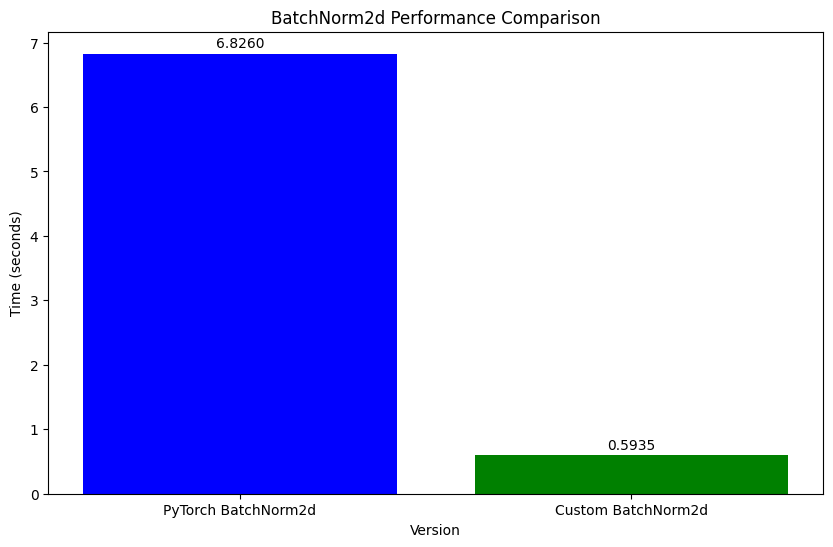

In [43]:
labels = ['PyTorch BatchNorm2d', 'Custom BatchNorm2d']
times = [pytorch_batch_norm_time, custom_batch_norm_time]
visualize(labels, times, 'BatchNorm2d')

## Convolution2d 

In [4]:
input_tensor1 = torch.randn(batch_size, num_features, height, width, device='cuda')
input_tensor2 = torch.randn(batch_size, num_features, height, width, device = 'cpu')

torch_conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=2, stride=2,)

numba_conv = NumbaConv2d(in_channels=3, out_channels=64, kernel_size=3, padding=2, stride=2).cuda()
numba_conv.weight.data.copy_(torch_conv.weight)
numba_conv.bias.data.copy_(torch_conv.bias)

start_time = time.time()
for _ in range(10):
    _ = torch_conv(input_tensor2)
pytorch_conv_time = time.time() - start_time
print(f"PyTorch conv2d Time: {pytorch_conv_time:.4f} secs ")


start_time = time.time()
for _ in range(10):
    _ = numba_conv(input_tensor1)
custom_conv_time = time.time() - start_time
print(f"Custom conv2d Time: {custom_conv_time:.4f} secs ")


torch.cuda.synchronize()

PyTorch conv2d Time: 42.3151 secs 
Custom conv2d Time: 6.9291 secs 


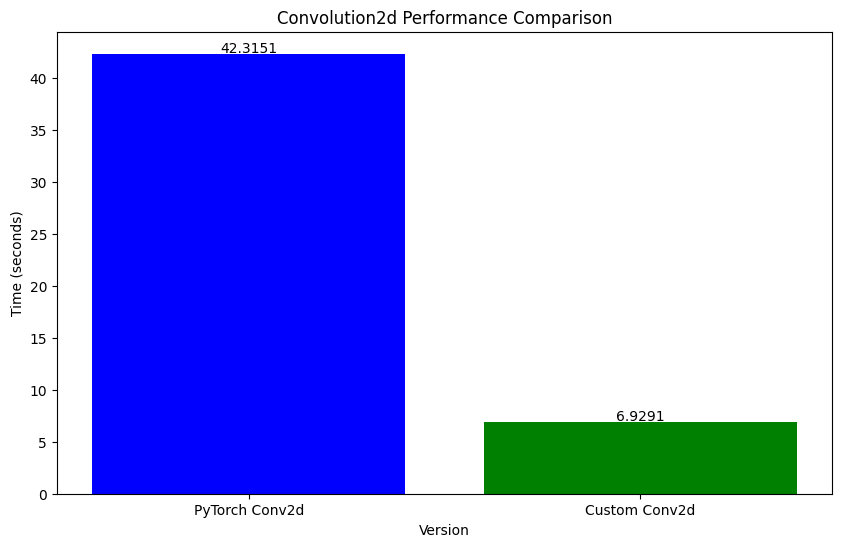

In [44]:
labels = ['PyTorch Conv2d', 'Custom Conv2d']
times = [pytorch_conv_time, custom_conv_time]
visualize(labels, times, 'Convolution2d')

## Linear

In [5]:
in_features = 1024
out_features = 512
batch_size = 1000


input_tensor1 = torch.randn(batch_size, in_features).cuda()  
input_tensor2 = torch.randn(batch_size, in_features, device="cpu")

numba_linear = NumbaLinear(in_features, out_features).cuda() 
pytorch_linear = nn.Linear(in_features, out_features)  

start_time = time.time()
for _ in range (1000):
    _ = pytorch_linear(input_tensor2)
pytorch_linear_time = time.time() - start_time
print(f"PyTorch built-in Linear execution time: {pytorch_linear_time:.6f} seconds")

start_time = time.time()
for _ in range (1000):
    _ = numba_linear(input_tensor1)
numba_linear_time = time.time() - start_time
print(f"Custom NumbaLinear execution time: {numba_linear_time:.6f} seconds")

torch.cuda.synchronize()


PyTorch built-in Linear execution time: 3.533079 seconds
Custom NumbaLinear execution time: 0.878363 seconds


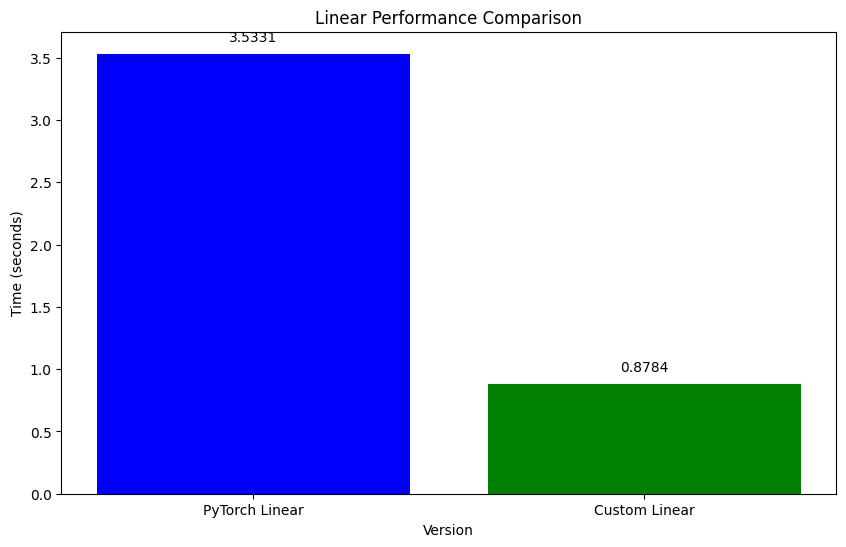

In [45]:
labels = ['PyTorch Linear', 'Custom Linear']
times = [pytorch_linear_time, numba_linear_time]
visualize(labels, times, 'Linear')

## MaxPool2d

In [6]:
input_tensor1 = torch.randn(batch_size, num_features, height, width, device='cuda')
input_tensor2 = torch.randn(batch_size, num_features, height, width, device = 'cpu')

numba_max_pooling = NumbaMaxPool2d(kernel_size=3, stride=2).cuda() 
torch_max_pooling = nn.MaxPool2d(kernel_size=3, stride=2)

start_time = time.time()
for _ in range (10):
    _ = torch_max_pooling(input_tensor2)
pytorch_max_pooling_time = time.time() - start_time

print(f"PyTorch maxpool Time: {pytorch_max_pooling_time:.4f} secs ")


start_time = time.time()
for _ in range (10):
    _ = numba_max_pooling(input_tensor1)
custom_max_pooling_time = time.time() - start_time
    
print(f"Custom maxpool Time: {custom_max_pooling_time:.4f} secs ")

torch.cuda.synchronize()

PyTorch maxpool Time: 14.1734 secs 
Custom maxpool Time: 0.5862 secs 


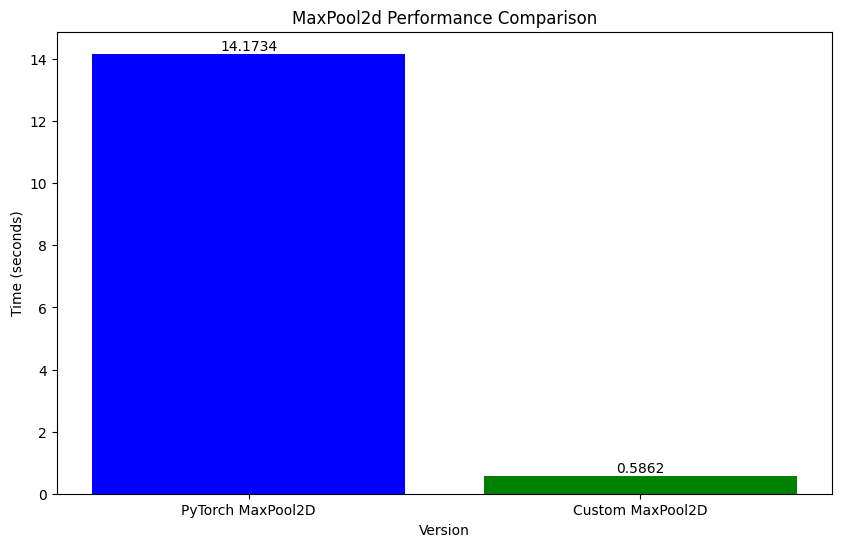

In [46]:
labels = ['PyTorch MaxPool2D', 'Custom MaxPool2D']
times = [pytorch_max_pooling_time, custom_max_pooling_time]

visualize(labels, times, 'MaxPool2d')

## Relu

In [7]:
input_tensor1 = torch.randn(batch_size, num_features, height, width, device='cuda')
input_tensor2 = torch.randn(batch_size, num_features, height, width, device = 'cpu')

numba_relu = NumbaReLU().cuda()
torch_relu = nn.ReLU()

#pytorch built-in relu
start_time = time.time()
for _ in range(10):
    _ = torch_relu(input_tensor2)
pytorch_relu_time = time.time() - start_time
print(f"PyTorch relu Time: {pytorch_relu_time:.4f} secs ")

#custom relu
start_time = time.time()
for _ in range(10):
    _ = numba_relu(input_tensor1)
custom_relu_time = time.time() - start_time
print(f"Custom relu Time: {custom_relu_time:.4f} secs ")

torch.cuda.synchronize()

PyTorch relu Time: 2.8512 secs 
Custom relu Time: 0.7718 secs 


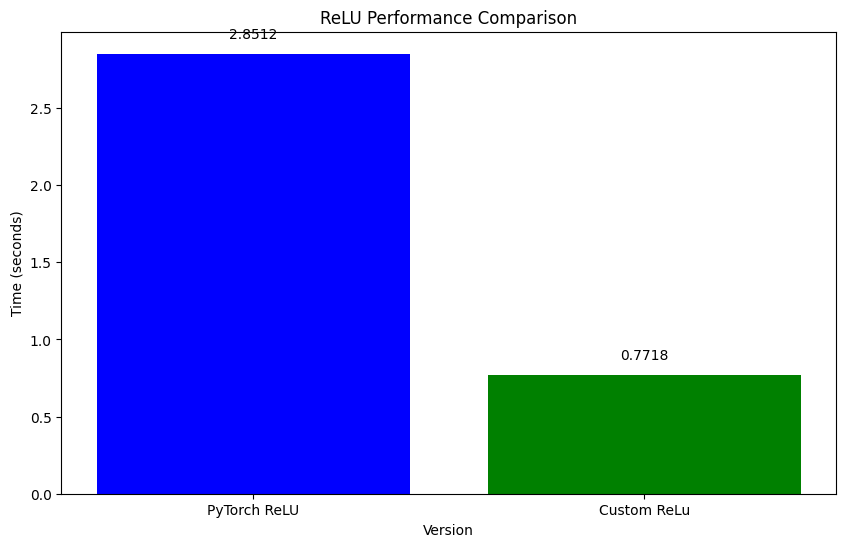

In [47]:
labels = ['PyTorch ReLU', 'Custom ReLu']
times = [pytorch_relu_time, custom_relu_time]

visualize(labels, times, 'ReLU')

## Numba ResNet9 

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NumbaResNet9(in_channels=3, num_classes=10).to(device)


input_tensor = torch.randn(10, 3, 64, 64).to(device) 

start = time.time()
for _ in range (1):
    _ = model(input_tensor)
Numba_resnet9_time = time.time() - start

print(f"Numba Resnet9 Time: {Numba_resnet9_time:.4f} secs ")


torch.cuda.synchronize()


Numba Resnet9 Time: 0.0259 secs 


## Pytorch ResNet9

In [9]:
model = ResNet9(in_channels=3, num_classes=10).to(device)

start = time.time()
for _ in range (1):
    _ = model(input_tensor)
    torch.cuda.empty_cache()
Pytorch_resnet9_time = time.time() - start

print(f"PyTorch Resnet9 Time: {Pytorch_resnet9_time:.4f} secs ")


PyTorch Resnet9 Time: 1.5367 secs 


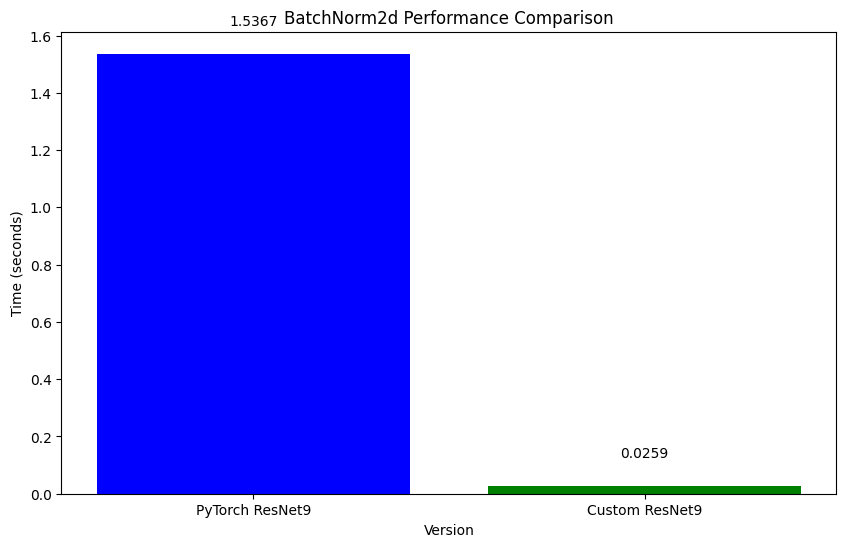

In [31]:
labels = ['PyTorch ResNet9', 'Custom ResNet9']
times = [Pytorch_resnet9_time, Numba_resnet9_time]

visualize(labels, times)

In [59]:
from IPython.display import HTML, display

# Data
layers = [
    'BatchNorm2d', 'Conv2d', 'ReLU', 'MaxPool2D', 'Linear', 'ResNet9'
]
pytorch_times = [pytorch_batch_norm_time, pytorch_conv_time,pytorch_relu_time, pytorch_max_pooling_time, pytorch_linear_time, Pytorch_resnet9_time]
custom_times = [custom_batch_norm_time, custom_conv_time, custom_relu_time, custom_max_pooling_time, numba_linear_time, Numba_resnet9_time ]

html_table = """
<style>
    table {
        width: 80%;
        border-collapse: collapse;
        margin: 25px auto;
        font-size: 20px;
        text-align: center;
        color: black;
    }
    th, td {
        padding: 15px;
        border: 1px solid black;
    }
    th {
        background-color: #f0f0f0;
    }
    tr:nth-child(even) {
        background-color: #ffffff;
    }
    tr:nth-child(odd) {
        background-color: #f7f7f7;
    }
    tr:hover {
        background-color: #e0e0e0;
    }
</style>
<table>
    <tr>
        <th>Layers</th>
        <th>PyTorch Time (seconds)</th>
        <th>Custom Time (seconds)</th>
    </tr>
"""


for layers, pytorch_time, custom_time in zip(layers, pytorch_times, custom_times):
    html_table += f"""
    <tr>
        <td>{layers}</td>
        <td>{pytorch_time:.4f}</td>
        <td>{custom_time:.4f}</td>
    </tr>
    """

html_table += "</table>"

# Display the table
display(HTML(html_table))

Layers,PyTorch Time (seconds),Custom Time (seconds)
BatchNorm2d,6.8260,0.5935
Conv2d,42.3151,6.9291
ReLU,2.8512,0.7718
MaxPool2D,14.1734,0.5862
Linear,3.5331,0.8784
ResNet9,1.5367,0.0259
